In [202]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image,ImageDraw

In [203]:
file= open('coco_format_fish_data.json')
dataset= json.load(file)

In [204]:
print(dataset.keys())

dict_keys(['images', 'annotations', 'info', 'licenses', 'categories'])


In [205]:
images= pd.DataFrame(dataset['images'])
annotations= pd.DataFrame(dataset['annotations'])
del annotations['segmentation']
print(images.head())
print(annotations.head())

   license         file_name  width  height  id
0        0  21_07_21-B16.jpg   4032    3024   0
1        0  21_04_21-B41.jpg   4032    3024   1
2        0   26_05_21-B9.jpg   4032    3024   2
3        0  20_04_21-B14.jpg   4032    3024   3
4        0   14_05_21-B6.jpg   3648    2736   4
   iscrowd  image_id                                     bbox           area  \
0        0       871  [606.0, 446.2339, 1226.6115, 2124.7661]  956750.024299   
1        0       871      [1327.0, 678.8187, 868.211, 1954.0]  851168.961635   
2        0       871     [1949.0, 606.8033, 652.0, 2046.1967]  853642.308700   
3        0       871  [2437.3292, 542.9875, 716.1556, 1915.5]  769454.532116   
4        0       871  [3081.0, 441.6543, 626.6804, 1871.4244]  706304.906956   

   id  category_id  
0   1            0  
1   2            0  
2   3            0  
3   4            0  
4   5            0  


In [206]:
images.head()

,license,file_name,width,height,id
0,0,21_07_21-B16.jpg,4032,3024,0
1,0,21_04_21-B41.jpg,4032,3024,1
2,0,26_05_21-B9.jpg,4032,3024,2
3,0,20_04_21-B14.jpg,4032,3024,3
4,0,14_05_21-B6.jpg,3648,2736,4


In [207]:
annotations.head()

,iscrowd,image_id,bbox,area,id,category_id
0,0,871,"[606.0, 446.2339, 1226.6115, 2124.7661]",956750.024299,1,0
1,0,871,"[1327.0, 678.8187, 868.211, 1954.0]",851168.961635,2,0
2,0,871,"[1949.0, 606.8033, 652.0, 2046.1967]",853642.308700,3,0
3,0,871,"[2437.3292, 542.9875, 716.1556, 1915.5]",769454.532116,4,0
4,0,871,"[3081.0, 441.6543, 626.6804, 1871.4244]",706304.906956,5,0


In [208]:
box_for_500 = annotations.loc[annotations['image_id']==500]
len(box_for_500)

16

In [209]:
merged_data = pd.merge(images, annotations, left_on='id', right_on='image_id')
merged_data.head()

,license,file_name,width,height,id_x,iscrowd,image_id,bbox,area,id_y,category_id
0,0,21_04_21-B41.jpg,4032,3024,1,0,1,"[714.8573, 332.0, 1211.1427, 630.0]",235468.231415,556,3
1,0,21_04_21-B41.jpg,4032,3024,1,0,1,"[1271.0, 316.53, 1161.9159, 685.4159]",224904.545647,557,3
2,0,21_04_21-B41.jpg,4032,3024,1,0,1,"[1986.5905, 334.2359, 1140.4095, 342.7641]",214098.201927,558,3
3,0,21_04_21-B41.jpg,4032,3024,1,0,1,"[2380.3208, 533.9781, 1323.4675, 273.0219]",217046.859605,559,3
4,0,21_04_21-B41.jpg,4032,3024,1,0,1,"[2833.0, 765.5651, 629.6211, 983.4349]",256271.443564,560,3


In [210]:
box_for_500 = merged_data.loc[merged_data['image_id']==500]
len(box_for_500)

16

In [211]:
merged_data = merged_data[['image_id', 'file_name', 'width', 'height', 'bbox', 'category_id']]
merged_data.head()

,image_id,file_name,width,height,bbox,category_id
0,1,21_04_21-B41.jpg,4032,3024,"[714.8573, 332.0, 1211.1427, 630.0]",3
1,1,21_04_21-B41.jpg,4032,3024,"[1271.0, 316.53, 1161.9159, 685.4159]",3
2,1,21_04_21-B41.jpg,4032,3024,"[1986.5905, 334.2359, 1140.4095, 342.7641]",3
3,1,21_04_21-B41.jpg,4032,3024,"[2380.3208, 533.9781, 1323.4675, 273.0219]",3
4,1,21_04_21-B41.jpg,4032,3024,"[2833.0, 765.5651, 629.6211, 983.4349]",3


In [212]:
merged_data = merged_data.rename(columns={'image_id': 'id'})
merged_data.head()

,id,file_name,width,height,bbox,category_id
0,1,21_04_21-B41.jpg,4032,3024,"[714.8573, 332.0, 1211.1427, 630.0]",3
1,1,21_04_21-B41.jpg,4032,3024,"[1271.0, 316.53, 1161.9159, 685.4159]",3
2,1,21_04_21-B41.jpg,4032,3024,"[1986.5905, 334.2359, 1140.4095, 342.7641]",3
3,1,21_04_21-B41.jpg,4032,3024,"[2380.3208, 533.9781, 1323.4675, 273.0219]",3
4,1,21_04_21-B41.jpg,4032,3024,"[2833.0, 765.5651, 629.6211, 983.4349]",3


In [221]:
DATASET_PATH = "DATASET/"
def read_image(image_path: str) -> Image.Image:
    try:
        image = Image.open(DATASET_PATH+image_path)
        return image
    except:
        return None

def draw_boxes(image: Image.Image, box: list) -> None:
    draw = ImageDraw.Draw(image)
    draw.rectangle((box[0], box[1], box[0]+box[2], box[1]+box[3]), outline=(0,0,0), width=5)

def display_image(image: Image.Image) -> None:
    plt.imshow(image)
    plt.show()

def show_image_with_boxes(image_id: str) -> None:
    try:
        image = read_image(merged_data.loc[merged_data['id'] == image_id]['file_name'].iloc[0])
    except:
        image = None
    if image is None:
        print("Image not found")
        return
    bbox = merged_data.loc[merged_data['id'] == image_id]['bbox']
    for box in bbox:
        draw_boxes(image, box)
    display_image(image)

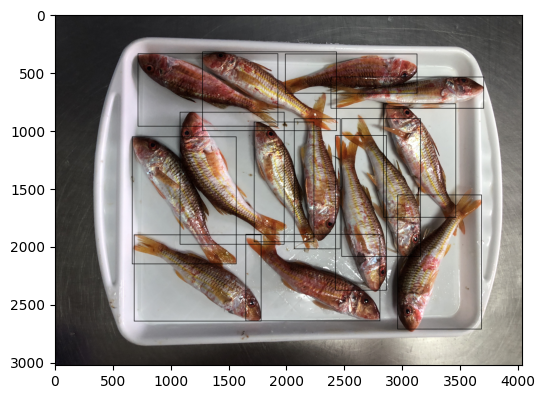

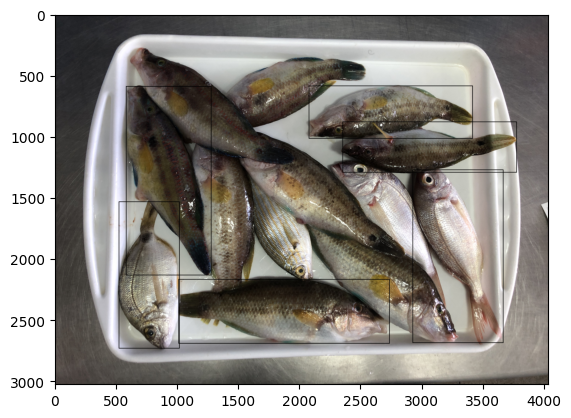

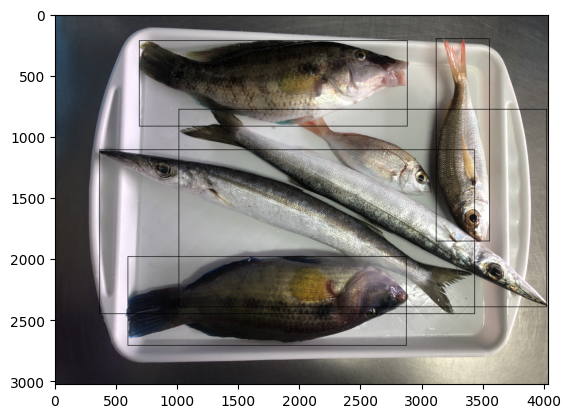

Image not found


In [227]:
figure = plt.figure(figsize=(20, 10))
i = 1
for j in range(496, 500):
    figure.add_subplot(2, 2, i)
    show_image_with_boxes(i)
    i += 1